# [Taller 03] series de Taylor y polinomios de Lagrange

**Nombre:**
* Luis Lema
**Fecha:** 
* 11/11/2025
**Git hub link:**
* https://github.com/LuisALema/Metodos_Numericos_2025B/blob/main/Talleres/Taller3.ipynb

Grafique las curvas de las series de Taylor de varios órdenes para los siguientes casos:

* $f(x) = \cos(x)$, centrado en $x_0 = 0$
* $f(x) = \frac{1}{1-x}$
* $f(x) = \ln(x)$, centrado en $x_0 = 1$



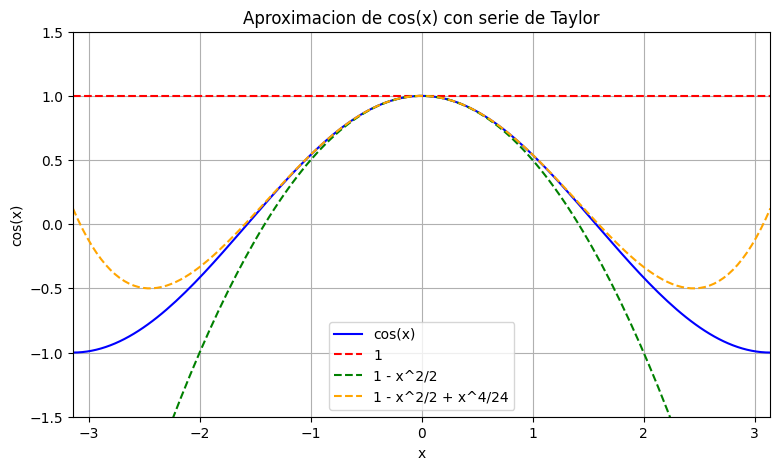

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xval = np.linspace(-np.pi, np.pi, 150)

a0 = np.ones_like(xval)
a1 = 1 - 0.5 * xval**2
a2 = 1 - 0.5 * xval**2 + (xval**4) / 24
real = np.cos(xval)

fig, g = plt.subplots(figsize=(9,5))
g.plot(xval, real, label='cos(x)', color='blue')
g.plot(xval, a0, '--', label='1', color='red')
g.plot(xval, a1, '--', label='1 - x^2/2', color='green')
g.plot(xval, a2, '--', label='1 - x^2/2 + x^4/24', color='orange')

g.set_title('Aproximacion de cos(x) con serie de Taylor')
g.set_xlabel('x')
g.set_ylabel('cos(x)')
g.legend()
g.grid(True)
g.set_xlim(-np.pi, np.pi)
g.set_ylim(-1.5, 1.5)
plt.show()


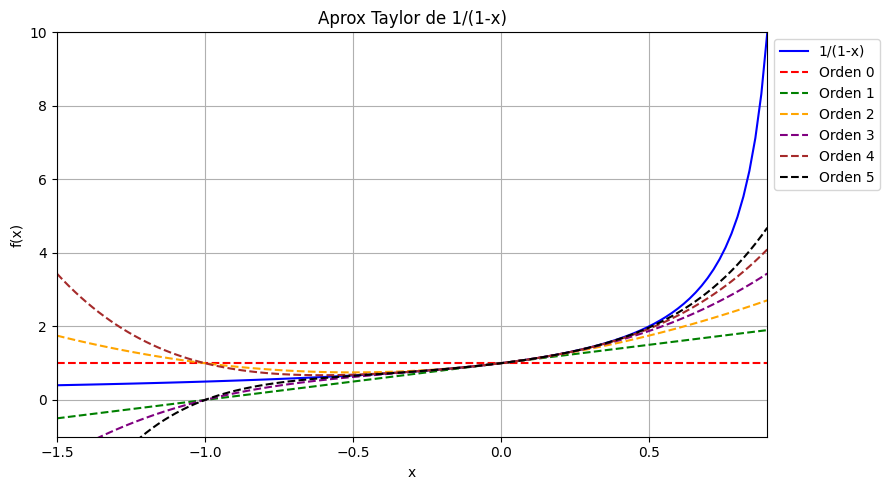

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xv = np.linspace(-1.5, 0.9, 120)
freal = 1 / (1 - xv)

t0 = np.ones_like(xv)
t1 = 1 + xv
t2 = 1 + xv + xv**2
t3 = 1 + xv + xv**2 + xv**3
t4 = 1 + xv + xv**2 + xv**3 + xv**4
t5 = 1 + xv + xv**2 + xv**3 + xv**4 + xv**5

fig, g = plt.subplots(figsize=(9,5))
g.plot(xv, freal, label='1/(1-x)', color='blue')
g.plot(xv, t0, '--', label='Orden 0', color='red')
g.plot(xv, t1, '--', label='Orden 1', color='green')
g.plot(xv, t2, '--', label='Orden 2', color='orange')
g.plot(xv, t3, '--', label='Orden 3', color='purple')
g.plot(xv, t4, '--', label='Orden 4', color='brown')
g.plot(xv, t5, '--', label='Orden 5', color='black')

g.set_title('Aprox Taylor de 1/(1-x)')
g.set_xlabel('x')
g.set_ylabel('f(x)')
g.legend(loc='upper left', bbox_to_anchor=(1,1))
g.grid(True)
g.set_xlim(-1.5, 0.9)
g.set_ylim(-1, 10)

plt.tight_layout()
plt.show()


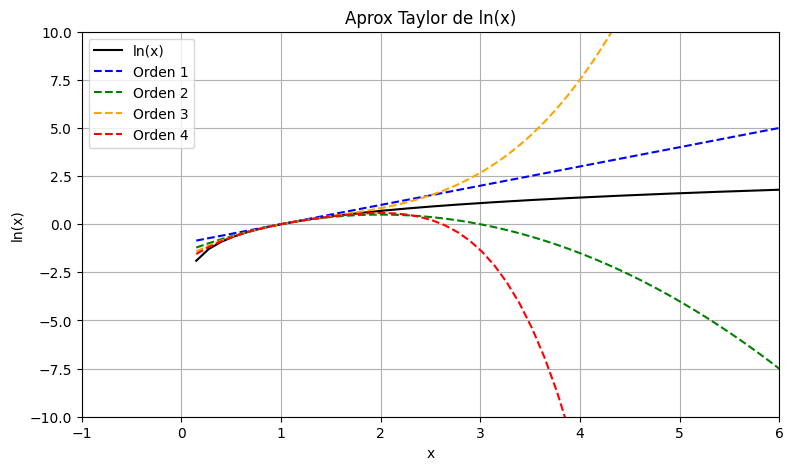

In [5]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(0.15, 20, 160)

a0 = (xx - 1)
a1 = (xx - 1) - 0.5 * (xx - 1)**2
a2 = (xx - 1) - 0.5 * (xx - 1)**2 + (1/3) * (xx - 1)**3
a3 = (xx - 1) - 0.5 * (xx - 1)**2 + (1/3) * (xx - 1)**3 - 0.25 * (xx - 1)**4

fig, g = plt.subplots(figsize=(9,5))
g.plot(xx, np.log(xx), label='ln(x)', color='black')
g.plot(xx, a0, '--', label='Orden 1', color='blue')
g.plot(xx, a1, '--', label='Orden 2', color='green')
g.plot(xx, a2, '--', label='Orden 3', color='orange')
g.plot(xx, a3, '--', label='Orden 4', color='red')

g.set_title('Aprox Taylor de ln(x)')
g.set_xlabel('x')
g.set_ylabel('ln(x)')
g.legend()
g.grid(True)
g.set_xlim(-1, 6)
g.set_ylim(-10, 10)
plt.show()


## Encuentre el polinomio de Lagrange para los siguientes datos y grafique:

* $(0, 0), (30, 0.5), (60, 3\sqrt{2}), (90, 1)$
* $(1, 1), (2, 2), (3, 2)$
* $(-2, 5), (1, 7), (3, 11), (7, 34)$

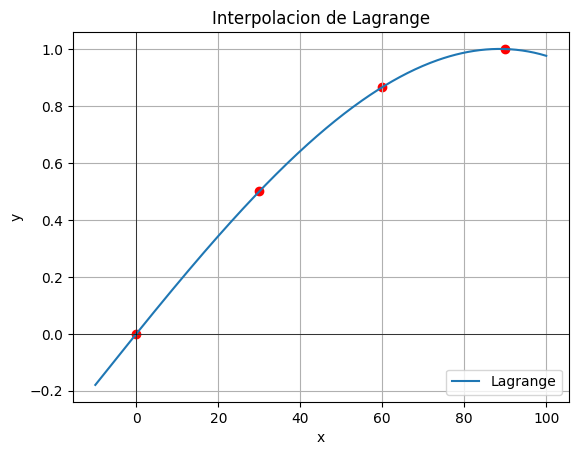

Polinomio simplificado:
x*(-6.05408712057503e-7*x**2 - 1.99435471456922e-5*x + 0.0178098409218892)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify

pts = [(0,0),(30,0.5),(60,np.sqrt(3)/2),(90,1)]
xv = [p[0] for p in pts]
yv = [p[1] for p in pts]

def lagr(xa, xd, yd):
    n = len(xd)
    p = 0
    for i in range(n):
        t = yd[i]
        for j in range(n):
            if j != i:
                t *= (xa - xd[j]) / (xd[i] - xd[j])
        p += t
    return p

xr = np.linspace(min(xv)-10, max(xv)+10, 300)
yr = [lagr(xx, xv, yv) for xx in xr]

plt.plot(xr, yr, label='Lagrange')
plt.scatter(xv, yv, color='red')
plt.title('Interpolacion de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

x = symbols('x')
poli = 0
for i in range(len(xv)):
    t = yv[i]
    for j in range(len(xv)):
        if j != i:
            t *= (x - xv[j]) / (xv[i] - xv[j])
    poli += t

simp = simplify(poli)
print("Polinomio simplificado:")
print(simp)


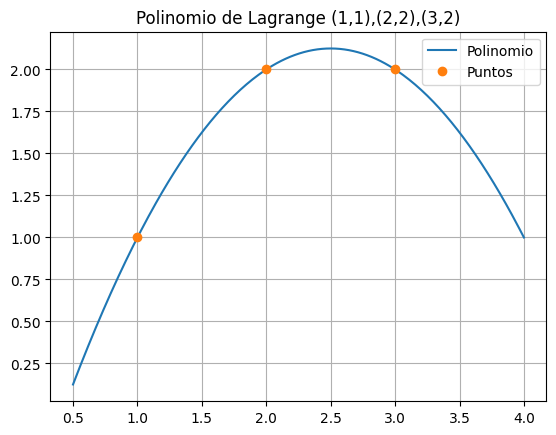

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (-x**2 + 5*x - 2)/2

pts = [(1,1),(2,2),(3,2)]
xx = np.linspace(0.5,4,300)
yy = f(xx)

plt.plot(xx,yy,label='Polinomio')
xv=[p[0] for p in pts]
yv=[p[1] for p in pts]
plt.plot(xv,yv,'o',label='Puntos')
plt.legend()
plt.grid()
plt.title('Polinomio de Lagrange (1,1),(2,2),(3,2)')
plt.show()


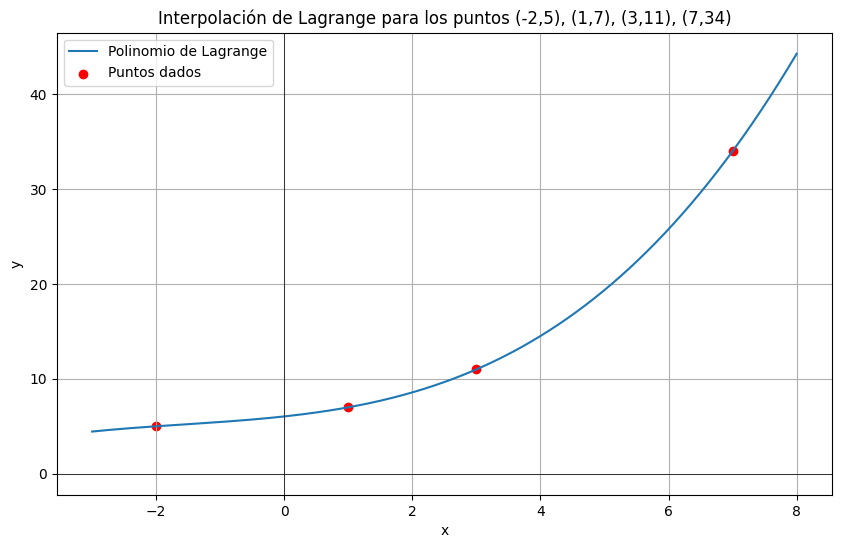


El polinomio de Lagrange simplificado es:
43*x**3/1080 + 101*x**2/540 + 793*x/1080 + 1087/180


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, lambdify

# Nuevos datos dados
puntos = [(-2, 5), (1, 7), (3, 11), (7, 34)]
x = [p[0] for p in puntos]
y = [p[1] for p in puntos]

# Función para calcular el polinomio de Lagrange
def lagrange_poly(x_val, x_data, y_data):
    n = len(x_data)
    poly = 0
    for i in range(n):
        # Calcular el término L_i(x)
        term = y_data[i]
        for j in range(n):
            if j != i:
                term *= (x_val - x_data[j]) / (x_data[i] - x_data[j])
        poly += term
    return poly

# Crear un rango de valores x para evaluar el polinomio
x_vals = np.linspace(min(x)-1, max(x)+1, 400)
y_vals = [lagrange_poly(xv, x, y) for xv in x_vals]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Polinomio de Lagrange')
plt.scatter(x, y, color='red', label='Puntos dados')
plt.title('Interpolación de Lagrange para los puntos (-2,5), (1,7), (3,11), (7,34)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

# Mostrar el polinomio de forma algebraica (usando sympy para simplificar)
x_sym = symbols('x')
poly = 0
n = len(x)
for i in range(n):
    term = y[i]
    for j in range(n):
        if j != i:
            term *= (x_sym - x[j]) / (x[i] - x[j])
    poly += term

poly_simplificado = simplify(poly)
print("\nEl polinomio de Lagrange simplificado es:")
print(poly_simplificado)